<a href="https://colab.research.google.com/github/HowardHNguyen/Natural_Language_Processing-NLP/blob/main/NLP_Multilingual_Emotion_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Step 1: Loading EmoLex
Assuming you have a CSV file where each row represents a word and each column represents an emotion with boolean values:

In [93]:
import pandas as pd

# Load EmoLex from a CSV file
emolex_df = pd.read_csv('/content/drive/MyDrive/data/NRC-Emotion-Lexicon-Wordlevel-v092_en.csv')
emolex_words = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emotions = emolex_words.columns.drop('word')

# Step 2: Preprocessing Text Data
We'll use NLTK for tokenization and other preprocessing tasks:

In [94]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Set of English stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [95]:
def preprocess(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and punctuation
    tokens = [word for word in tokens if word.isalnum() and not word in stop_words]
    return tokens

# Step 3: Analyzing Emotions in Text
Here's how to map the preprocessed text to the emotions from EmoLex:

In [96]:
def analyze_emotions(text, emolex_words):
    tokens = preprocess(text)
    # Initialize a dictionary to count each emotion
    emotion_counts = {emotion: 0 for emotion in emotions}

    # Count each emotion in the text
    for word in tokens:
        if word in emolex_words.index:
            for emotion in emotions:
                if emolex_words.loc[word][emotion] == 1:
                    emotion_counts[emotion] += 1
    return emotion_counts

**Example Usage**

Let's analyze a simple sentence:

In [97]:
# Example text
text = "I love sunny days but I hate rain."

# Analyze emotions in the text
emotion_counts = analyze_emotions(text, emolex_words.set_index('word'))
print(emotion_counts)

{'anger': 1, 'anticipation': 1, 'disgust': 1, 'fear': 1, 'joy': 2, 'negative': 1, 'positive': 2, 'sadness': 1, 'surprise': 1, 'trust': 0}


# Applying for Tale of Kieu (Vietnamese + English) datasets
# Step 1: Read the CSV File
First, we need to read our CSV file containing the text data.

In [98]:
import pandas as pd
tale_of_kieu_en = pd.read_csv('/content/drive/MyDrive/data/tale_of_kieu_en.csv')
tale_of_kieu_vi = pd.read_csv('/content/drive/MyDrive/data/tale_of_kieu_vi.csv')

# Step 2: Apply the Emotion Analysis
Next, we can apply the analyze_emotions function to each row in the DataFrame. For efficiency, it’s best to vectorize this operation or use the .apply() method from Pandas, which is straightforward for custom functions.

In [99]:
# Apply the analyze_emotions function to each text entry
tale_of_kieu_en['emotions'] = tale_of_kieu_en['sentence'].apply(lambda x: analyze_emotions(x, emolex_words.set_index('word')))
tale_of_kieu_vi['emotions'] = tale_of_kieu_vi['sentence'].apply(lambda x: analyze_emotions(x, emolex_words.set_index('word')))

# Step 3: Exploring the Results
With the emotion counts added to your DataFrame, we might want to explore or summarize these results. For instance, we can aggregate these emotion counts or visualize them.

In [100]:
tale_of_kieu_en.head()

,sentence,emotions
0,Within a hundred-year lifespan in this earthly...,"{'anger': 0, 'anticipation': 0, 'disgust': 0, ..."
1,Genius and Destiny have a tendency to oppose e...,"{'anger': 0, 'anticipation': 0, 'disgust': 0, ..."
2,A turbulent mulberry-field-covered-by-sea peri...,"{'anger': 0, 'anticipation': 0, 'disgust': 0, ..."
3,The things that we saw still deeply pain our h...,"{'anger': 0, 'anticipation': 0, 'disgust': 0, ..."
4,It’s not strange that beauty may beget misery.,"{'anger': 1, 'anticipation': 0, 'disgust': 1, ..."


In [101]:
tale_of_kieu_vi.head()

,sentence,emotions
0,"Trăm năm trong cõi người ta,","{'anger': 0, 'anticipation': 0, 'disgust': 0, ..."
1,Chữ tài chữ mệnh khéo là ghét nhau.,"{'anger': 0, 'anticipation': 0, 'disgust': 0, ..."
2,"Trải qua một cuộc bể dâu,","{'anger': 0, 'anticipation': 0, 'disgust': 0, ..."
3,Những điều trông thấy mà đau đớn lòng.,"{'anger': 0, 'anticipation': 0, 'disgust': 0, ..."
4,"Lạ gì bỉ sắc tư phong,","{'anger': 0, 'anticipation': 0, 'disgust': 0, ..."


In [102]:
# expanding the dictionary into separate columns
emotions_df_en = tale_of_kieu_en['emotions'].apply(pd.Series)
emotions_df_vi = tale_of_kieu_vi['emotions'].apply(pd.Series)

In [103]:
# join the expanded emotions back to the original df
tale_of_kieu_en = pd.concat([tale_of_kieu_en, emotions_df_en], axis=1)
tale_of_kieu_vi = pd.concat([tale_of_kieu_vi, emotions_df_vi], axis=1)

In [104]:
# drop the original emotions column as it's no longer needed
tale_of_kieu_en.drop('emotions', axis=1, inplace=True)
tale_of_kieu_vi.drop('emotions', axis=1, inplace=True)

In [105]:
# save the result to a new CSV file
tale_of_kieu_en.to_csv('/content/drive/MyDrive/data/tale_of_kieu_en_with_emotions.csv', index=False)
tale_of_kieu_vi.to_csv('/content/drive/MyDrive/data/tale_of_kieu_vi_with_emotions.csv', index=False)

# Step 4: Visualization and Summary Statistics
We might also want to visualize or generate summary statistics from our results to better understand the distribution of emotions in our text data.

In [106]:
import matplotlib.pyplot as plt

# Summing up each emotion column to see the total counts of each emotion
emotion_totals_en = emotions_df_en.sum().sort_values()
emotion_totals_vi = emotions_df_vi.sum().sort_values()

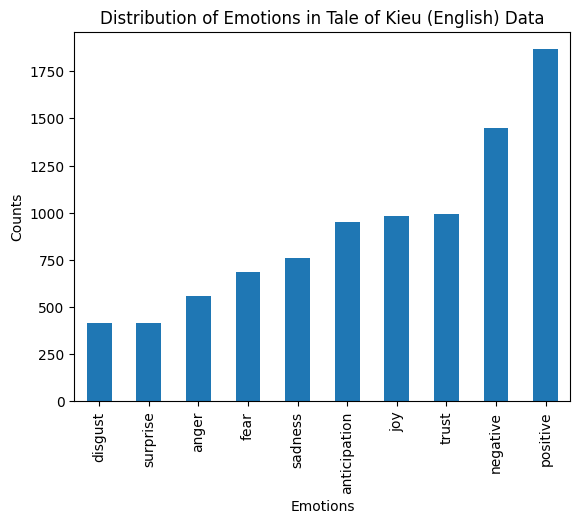

In [107]:
# Creating a bar plot for visualizing the counts of each emotion
emotion_totals_en.plot(kind='bar')
plt.title('Distribution of Emotions in Tale of Kieu (English) Data')
plt.xlabel('Emotions')
plt.ylabel('Counts')
plt.show()

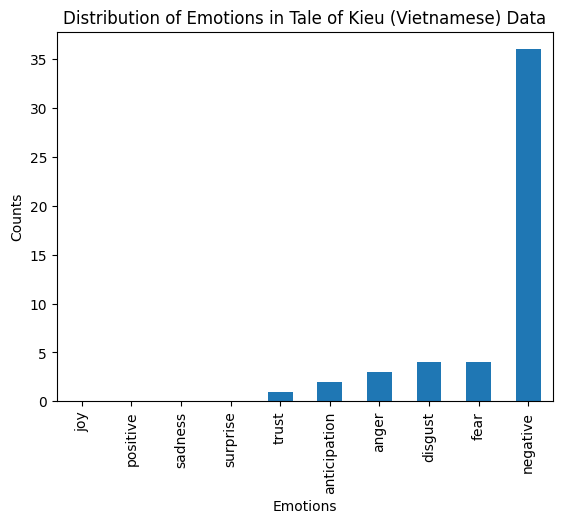

In [108]:
# Creating a bar plot for visualizing the counts of each emotion
emotion_totals_vi.plot(kind='bar')
plt.title('Distribution of Emotions in Tale of Kieu (Vietnamese) Data')
plt.xlabel('Emotions')
plt.ylabel('Counts')
plt.show()

# Model Evaluation

In [109]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

# Let's say we have the true labels and the predictions
true_labels = ['joy', 'sadness', 'fear', 'joy', 'anger', 'surprise', 'trust',
               'disgust', 'anticipation', 'negative']  # manually annotated emotion labels
predicted_labels = ['joy', 'sadness', 'anticipation', 'joy', 'trust',
                    'surprise', 'fear', 'disgust', 'anticipation', 'positive']  # Emotion labels predicted by EmoLex

In [110]:
# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [111]:
# Print out the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Confusion Matrix for each class
conf_matrix = confusion_matrix(true_labels,
                               predicted_labels, labels=['joy', 'sadness', 'anticipation',
                                                         'joy', 'trust', 'surprise', 'fear',
                                                         'disgust', 'anticipation', 'positive'])

Accuracy: 0.6
Precision: 0.55
Recall: 0.6
F1 Score: 0.5666666666666667


- Accuracy (0.6): This means that 60% of the total predictions made by our model were correct. In other words, for every 100 texts, the model correctly identified the emotions in 60 of them.

- Precision (0.55): Precision measures the accuracy of the positive predictions. In this context, a precision of 0.55 indicates that when the model predicted a certain emotion, that prediction was correct 55% of the time. It is a measure of quality or purity of the model's positive predictions.

- Recall (0.6): Recall, also known as sensitivity, measures the model's ability to correctly identify all relevant instances. A recall of 0.6 means that the model correctly identified 60% of all the actual emotions present in the texts. It is a measure of completeness or inclusivity of the model's positive predictions.

- F1 Score (0.5667): The F1 score is the harmonic mean of precision and recall and is a single metric that combines both. An F1 score of 0.5667 suggests a balance between precision and recall. This is typically more useful than accuracy, especially when the classes are imbalanced. The closer the F1 score is to 1, the better the model's predictive power and balance between precision and recall.

In summary, these results suggest that the model has a fairly moderate performance in identifying emotions. The accuracy is relatively high at 60%, but the precision is somewhat lower, which means there are a fair number of false positives (instances where the model incorrectly predicted an emotion). The recall is equal to accuracy in this case, which indicates the model is relatively balanced in terms of the rate at which it finds all relevant instances.

The F1 score, while not low, shows that there's room for improvement. Ideally, we want the F1 score to be closer to 1, indicating high precision and high recall. An F1 score of around 0.57 suggests that we may need to look into our model to identify why some emotions are being misclassified, whether it's due to the model itself or the quality of the data it's being trained on.

# **Re-Evaluate and work on Vietnamese dataset with VNEmoLex Model**

# Step 1: Load VNEmoLex into a DataFrame
First, we need to read your VNEmoLex into a pandas DataFrame.

In [112]:
import pandas as pd

# Load the Vietnamese Emotion Lexicon
vnemolex_df = pd.read_csv('/content/drive/MyDrive/data/VnEmoLex_1442024.csv')
# Set the 'words' column as the index for easy lookup
vnemolex_df.set_index('words', inplace=True)

# Step 2: Preprocess vi_text.csv File
Now, load our vi_text.csv file and preprocess it. Preprocessing might include cleaning and tokenizing the text.

In [113]:
# Load your text data
vi_text_df = pd.read_csv('/content/drive/MyDrive/data/tale_of_kieu_vi.csv')

# Assume the column containing Vietnamese text is named 'text'
# Preprocessing function example
def preprocess(sentence):
    # Add any specific preprocessing steps here, such as:
    # - Tokenization
    # - Removing punctuation
    # - Lowercasing
    return sentence.lower().split()  # This is a placeholder

# Step 3: Define Emotion Calculation Function
Next, we need a function to calculate the emotion scores for each text row based on VNEmoLex.

In [115]:
# def calculate_emotions(sentence, lexicon):
    # Preprocess the text
#    tokens = preprocess(sentence)
    # Initialize emotion counts
#    emotions = {emotion: 0 for emotion in lexicon.columns}

    # Sum emotion values for each word in the text
#    for token in tokens:
#        if token in lexicon.index:
#            emotions = emotions + lexicon.loc[token]

    # Return the emotion counts
#    return emotions

In [114]:
def calculate_emotions(text, lexicon):
    # Preprocess the text
    tokens = preprocess(text)
    # Initialize emotion counts
    emotions = {emotion: 0 for emotion in lexicon.columns}

    # Sum emotion values for each word in the text
    for token in tokens:
        if token in lexicon.index:
            for emotion in lexicon.columns:
                # Ensure that the lexicon value is not NaN before adding
                lexicon_value = lexicon.loc[token][emotion]
                if pd.notna(lexicon_value):
                    emotions[emotion] += int(lexicon_value)

    # Return the emotion counts
    return emotions

# Step 4: Apply the Emotion Calculation to Our Dataset
Use the apply method to calculate emotions for each row in our dataset.

In [116]:
# Calculate emotions for each row of text data
vi_text_df['emotions'] = vi_text_df['sentence'].apply(lambda x: calculate_emotions(x, vnemolex_df))

In [117]:
# This will give us a column of dictionaries with emotion counts
# If we want to split the dictionaries into separate columns:
emotions_df = vi_text_df['emotions'].apply(pd.Series)

# Join the emotion counts back to your original DataFrame
vi_text_df = pd.concat([vi_text_df.drop('emotions', axis=1), emotions_df], axis=1)

# Step 5: Save the Results
Finally, save our DataFrame with the added emotion scores to a new CSV file.

In [118]:
# Save to a new CSV file
vi_text_df.to_csv('/content/drive/MyDrive/data/vi_text_with_emotions.csv', index=False)

# View the Results visually

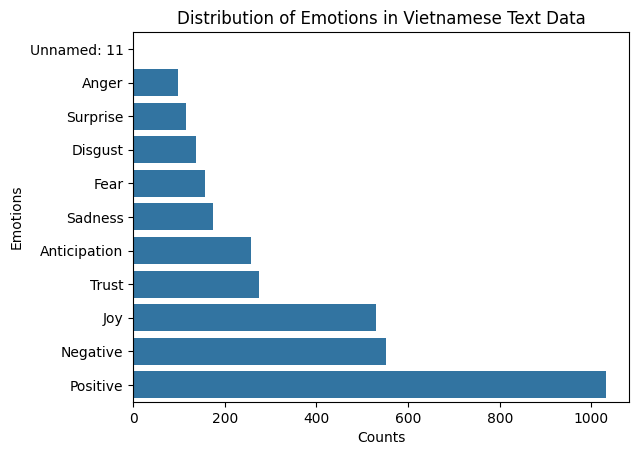

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# each row represents the emotion counts for a particular text entry.

# Sum up the emotion counts for the whole dataset
emotion_totals = emotions_df.sum().sort_values()

# Create a bar plot for the counts of each emotion
sns.barplot(x=emotion_totals.values, y=emotion_totals.index)

# Set the plot labels and title
plt.xlabel('Counts')
plt.ylabel('Emotions')
plt.title('Distribution of Emotions in Vietnamese Text Data')

# Display the plot
plt.show()

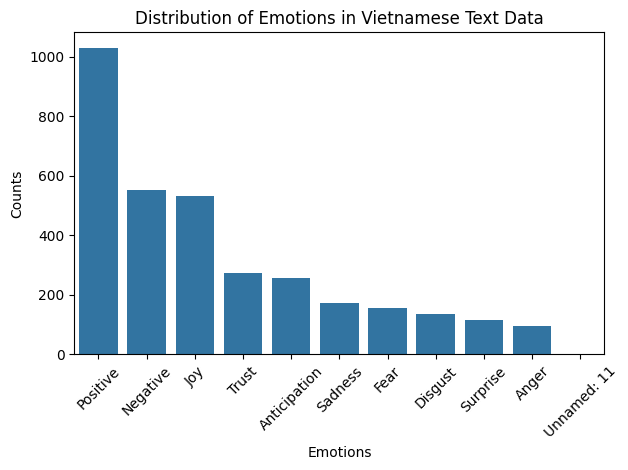

In [120]:
# Sum up the emotion counts for the whole dataset
emotion_totals = emotions_df.sum().sort_values(ascending=False)

# Create a vertical bar plot for the counts of each emotion
sns.barplot(y=emotion_totals.values, x=emotion_totals.index)

# Set the plot labels and title
plt.ylabel('Counts')
plt.xlabel('Emotions')
plt.title('Distribution of Emotions in Vietnamese Text Data')
plt.xticks(rotation=45)  # Rotate the x labels to avoid overlap

# Display the plot
plt.tight_layout()  # Adjust layout to fit all labels
plt.show()

# View both bar plot into one

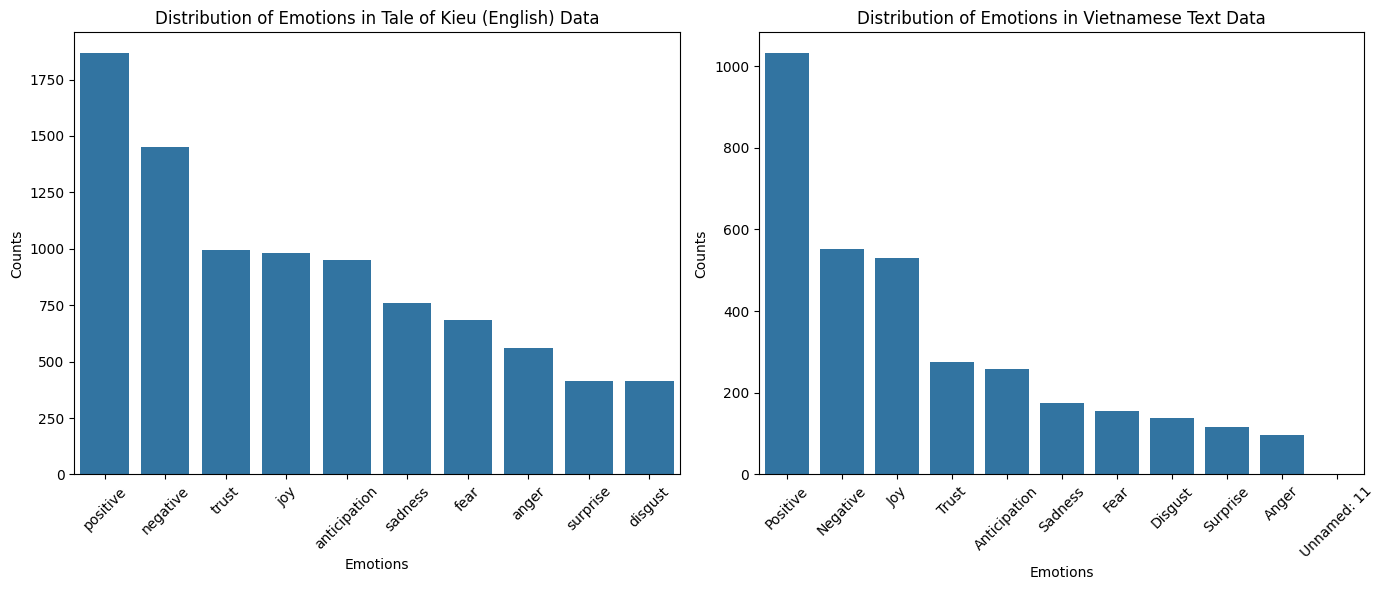

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming emotion_totals_en is a similar Series object with emotion counts for the English dataset
emotion_totals_en = emotions_df_en.sum().sort_values(ascending=False)

# Sum up the emotion counts for the Vietnamese dataset
emotion_totals_vi = emotions_df.sum().sort_values(ascending=False)

# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot for English dataset
sns.barplot(ax=axes[0], y=emotion_totals_en.values, x=emotion_totals_en.index)
axes[0].set_title('Distribution of Emotions in Tale of Kieu (English) Data')
axes[0].set_xlabel('Emotions')
axes[0].set_ylabel('Counts')
axes[0].tick_params(axis='x', rotation=45)

# Plot for Vietnamese dataset
sns.barplot(ax=axes[1], y=emotion_totals_vi.values, x=emotion_totals_vi.index)
axes[1].set_title('Distribution of Emotions in Vietnamese Text Data')
axes[1].set_xlabel('Emotions')
axes[1].set_ylabel('Counts')
axes[1].tick_params(axis='x', rotation=45)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


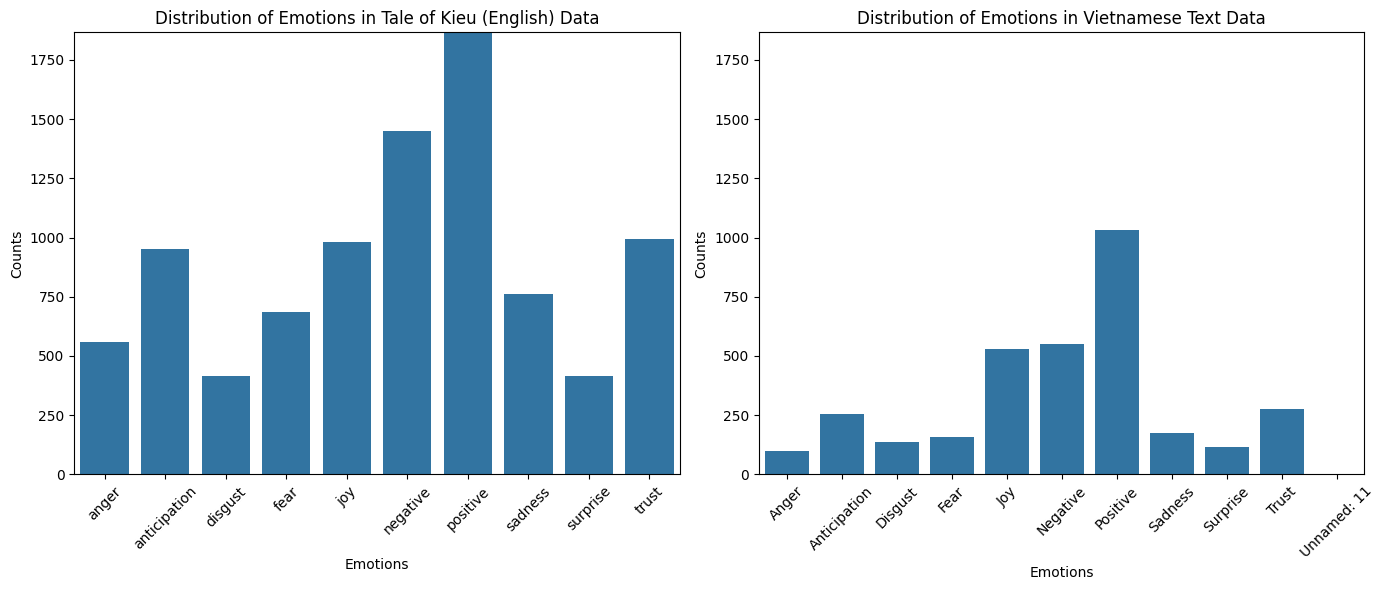

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming emotion_totals_en is a similar Series object with emotion counts for the English dataset
emotion_totals_en = emotions_df_en.sum().sort_values(ascending=False)  # Your English emotion totals data, sorted alphabetically
emotion_totals_vi = emotions_df.sum().sort_values(ascending=False)  # Your Vietnamese emotion totals data, sorted alphabetically

# Sort the series alphabetically by the index (emotion names)
emotion_totals_en = emotion_totals_en.sort_index()
emotion_totals_vi = emotion_totals_vi.sort_index()

# Determine the maximum count to set the same ylim for both plots
max_count = max(emotion_totals_en.max(), emotion_totals_vi.max())

# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot for English dataset
sns.barplot(ax=axes[0], x=emotion_totals_en.index, y=emotion_totals_en.values)
axes[0].set_title('Distribution of Emotions in Tale of Kieu (English) Data')
axes[0].set_xlabel('Emotions')
axes[0].set_ylabel('Counts')
axes[0].set_ylim(0, max_count)
axes[0].tick_params(axis='x', rotation=45)

# Plot for Vietnamese dataset
sns.barplot(ax=axes[1], x=emotion_totals_vi.index, y=emotion_totals_vi.values)
axes[1].set_title('Distribution of Emotions in Vietnamese Text Data')
axes[1].set_xlabel('Emotions')
axes[1].set_ylabel('Counts')
axes[1].set_ylim(0, max_count)
axes[1].tick_params(axis='x', rotation=45)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming emotion_totals_en and emotion_totals_vi are your data for English and Vietnamese datasets
# and they are already sorted alphabetically by the emotion names.

# First, create a DataFrame that combines both Series into one DataFrame
combined_emotions = pd.DataFrame({
    'English': emotion_totals_en,
    'Vietnamese': emotion_totals_vi
}).fillna(0)  # Fill NaNs with 0, in case there are emotions not present in one of the datasets

# Now melt the DataFrame to long-form for use with seaborn
combined_long = combined_emotions.reset_index().melt(id_vars='index', var_name='Language', value_name='Counts')

# Create a grouped barplot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='index', y='Counts', hue='Language', data=combined_long)

# Set the plot labels and title
plt.xlabel('Emotions')
plt.ylabel('Counts')
plt.title('Distribution of Emotions in Tale of Kieu (English and Vietnamese) Data')
plt.xticks(rotation=45)  # Rotate the emotion labels for better readability

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# First, create a DataFrame that combines both Series into one DataFrame
combined_emotions = pd.DataFrame({
    'English': emotion_totals_en,
    'Vietnamese': emotion_totals_vi
}).fillna(0)  # Fill NaNs with 0, in case there are emotions not present in one of the datasets

# Reset index to work with seaborn's categorical plotting
combined_emotions.reset_index(inplace=True)
combined_emotions.rename(columns={'index': 'Emotion'}, inplace=True)

# Melt the DataFrame to long-form for plotting
combined_long = combined_emotions.melt(id_vars='Emotion', var_name='Language', value_name='Counts')

# Create a figure and axis object
plt.figure(figsize=(12, 6))

# Plotting
sns.barplot(x='Emotion', y='Counts', hue='Language', data=combined_long, dodge=True)

# Set plot labels and title
plt.xlabel('Emotions')
plt.ylabel('Counts')
plt.title('Distribution of Emotions in Tale of Kieu (English and Vietnamese) Data')
plt.xticks(rotation=45)  # Rotate labels for better readability

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# First, create a DataFrame that combines both Series into one DataFrame
combined_emotions = pd.DataFrame({
    'English': emotion_totals_en,
    'Vietnamese': emotion_totals_vi
}).fillna(0)  # Fill NaNs with 0, in case there are emotions not present in one of the datasets

# Reset index to work with seaborn's categorical plotting
combined_emotions.reset_index(inplace=True)
combined_emotions.rename(columns={'index': 'Emotion'}, inplace=True)

# Melt the DataFrame to long-form for plotting
combined_long = combined_emotions.melt(id_vars='Emotion', var_name='Language', value_name='Counts')

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting
sns.barplot(x='Emotion', y='Counts', hue='Language', data=combined_long, dodge=True, ax=ax)

# Customize the plot with grid
ax.set_axisbelow(True)  # Ensures grid lines are behind the bars
ax.yaxis.grid(color='gray', linestyle='dashed')

# Set plot labels and title
plt.xlabel('Emotions')
plt.ylabel('Counts')
plt.title('Distribution of Emotions in Tale of Kieu (English and Vietnamese) Data')
plt.xticks(rotation=45)  # Rotate labels for better readability

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# First, combine into a DataFrame to facilitate handling
data = pd.DataFrame({
    'English': emotion_totals_en,
    'Vietnamese': emotion_totals_vi
}).fillna(0)  # Fill NaNs

# Set figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Define the position of the bars
bar_width = 0.35
index = np.arange(len(data))  # the label locations

# Plotting the bars
bars1 = ax.bar(index - bar_width/2, data['English'], bar_width, label='English')
bars2 = ax.bar(index + bar_width/2, data['Vietnamese'], bar_width, label='Vietnamese')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Emotions')
ax.set_ylabel('Counts')
ax.set_title('Distribution of Emotions in Tale of Kieu (English and Vietnamese) Data')
ax.set_xticks(index)
ax.set_xticklabels(data.index)
ax.legend()

# Rotate labels for better readability
plt.xticks(rotation=45)

# Adding grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')

# Show plot
plt.tight_layout()
plt.show()

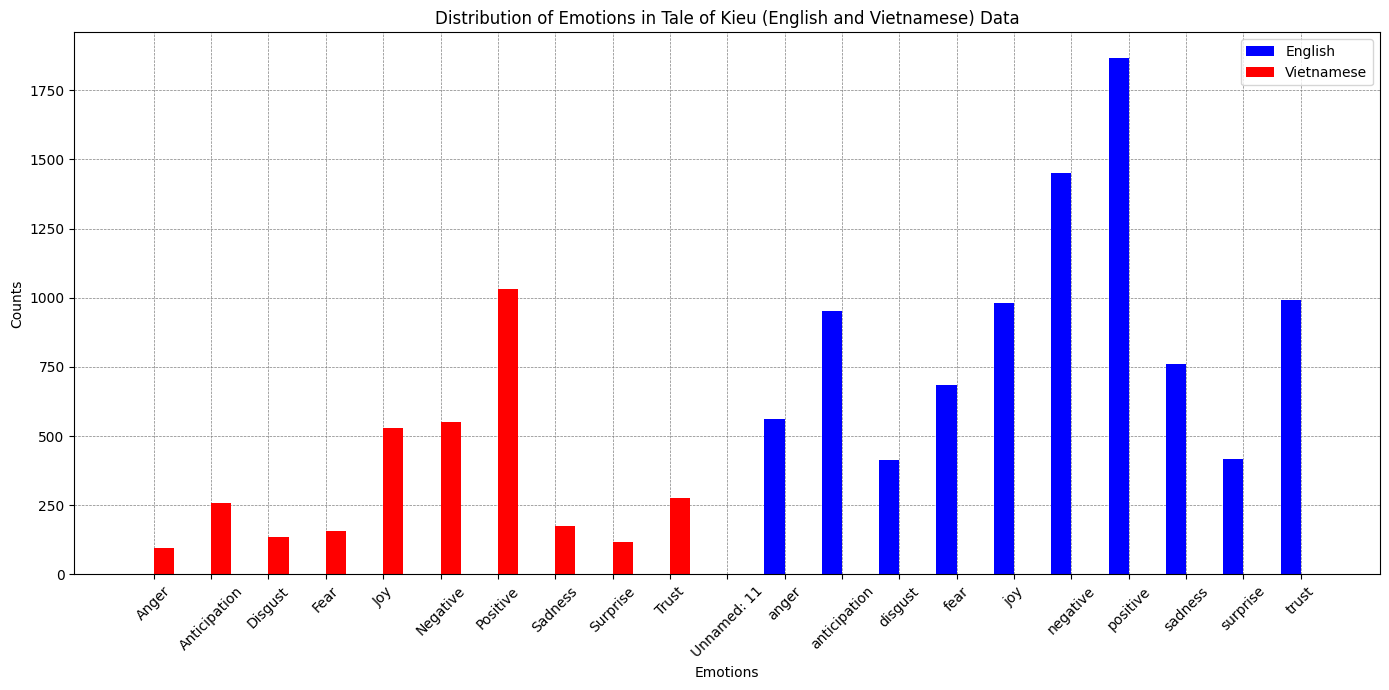

In [123]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Combine into a DataFrame to facilitate handling
data = pd.DataFrame({
    'English': emotion_totals_en,
    'Vietnamese': emotion_totals_vi
}).fillna(0)  # Fill NaNs

# Set figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Define the position of the bars
bar_width = 0.35
indices = np.arange(len(data))  # the label locations

# Plotting the bars for English
bars1 = ax.bar(indices - bar_width/2, data['English'], bar_width, label='English', color='b')

# Plotting the bars for Vietnamese
bars2 = ax.bar(indices + bar_width/2, data['Vietnamese'], bar_width, label='Vietnamese', color='r')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Emotions')
ax.set_ylabel('Counts')
ax.set_title('Distribution of Emotions in Tale of Kieu (English and Vietnamese) Data')
ax.set_xticks(indices)
ax.set_xticklabels(data.index, rotation=45)  # Rotate labels for better readability

# Add grid
ax.set_axisbelow(True)
ax.grid(which='major', linestyle='--', linewidth='0.5', color='gray')

# Adding legend
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

In [126]:
emotion_totals_en

anger            561
anticipation     952
disgust          414
fear             685
joy              982
negative        1450
positive        1866
sadness          760
surprise         416
trust            993
dtype: int64

In [127]:
emotion_totals_vi

Anger             97
Anticipation     257
Disgust          137
Fear             156
Joy              531
Negative         552
Positive        1031
Sadness          174
Surprise         116
Trust            275
Unnamed: 11        0
dtype: int64

In [128]:
# Hypothetical data loading; replace these with your actual loading code
emotion_data_en = {'anger': 561, 'anticipation':952,'disgust':414,'fear':685,'joy':982,
                   'negative':1450,'positive':1866,'sadness':760,'surprise':416,'trust':993}
emotion_data_vi = {'anger': 97, 'anticipation':257,'disgust':137,'fear':156,'joy':531,
                   'negative':552,'positive':1031,'sadness':174,'surprise':116,'trust':275}

# Convert dictionaries to Pandas Series
emotion_totals_en = pd.Series(emotion_data_en)
emotion_totals_vi = pd.Series(emotion_data_vi)

In [129]:
# Align and veriry data
# Create a sorted union of all unique emotions from both datasets
all_emotions = sorted(set(emotion_totals_en.index).union(set(emotion_totals_vi.index)))

# Reindex both series to this sorted list, filling missing values with zero
emotion_totals_en = emotion_totals_en.reindex(all_emotions, fill_value=0)
emotion_totals_vi = emotion_totals_vi.reindex(all_emotions, fill_value=0)

# Verify that the indices are aligned
print("Emotions in English data:", emotion_totals_en)
print("Emotions in Vietnamese data:", emotion_totals_vi)

Emotions in English data: anger            561
anticipation     952
disgust          414
fear             685
joy              982
negative        1450
positive        1866
sadness          760
surprise         416
trust            993
dtype: int64
Emotions in Vietnamese data: anger             97
anticipation     257
disgust          137
fear             156
joy              531
negative         552
positive        1031
sadness          174
surprise         116
trust            275
dtype: int64


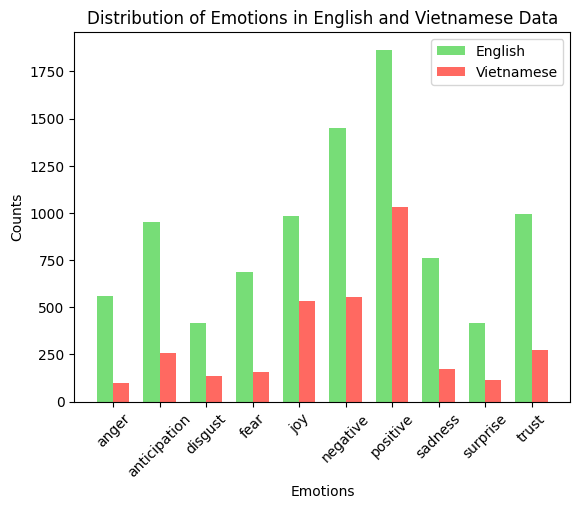

In [131]:
# Plotting
# Plotting parameters
num_locations = len(all_emotions)
index = np.arange(num_locations)
bar_width = 0.35

fig, ax = plt.subplots()

# Plot bars for English and Vietnamese datasets
ax.bar(index - bar_width/2, emotion_totals_en.values, bar_width, label='English', color='#77dd77')
ax.bar(index + bar_width/2, emotion_totals_vi.values, bar_width, label='Vietnamese', color='#ff6961')

# Set labels and title
ax.set_xlabel('Emotions')
ax.set_ylabel('Counts')
ax.set_title('Distribution of Emotions in English and Vietnamese Data')
ax.set_xticks(index)
ax.set_xticklabels(all_emotions, rotation=45)
ax.legend()

# Display the plot
plt.show()